# Exercise 4

In [72]:
def EcoRI(dna):
  dna = dna.split("GAATTC")
  return dna[0]+"G", "AATTC"+dna[1]

part1, part2 = EcoRI("ACGACACAGCATCGCGAATTCCCATCGCATTATGATTGA")
print(part1, part2)

ACGACACAGCATCGCG AATTCCCATCGCATTATGATTGA


# Exercise 5

In [73]:
!pip install biopython

In [74]:
!wget -nc https://gitlab.uoclabs.uoc.es/prog_bioinf/data/-/raw/master/Unidad4/multipleSeqs.fa --no-check-certificate

File ‘multipleSeqs.fa’ already there; not retrieving.



In [75]:
from Bio import SeqIO

records = SeqIO.parse("multipleSeqs.fa", "fasta")
for seq_record in records:
  # For each sequence we Will print the ID and length
  print('ID: "', seq_record.id, '" - longitud: ', len(seq_record))

ID: " NT_033779.5 " - longitud:  134
ID: " NC_004353.4 " - longitud:  125
ID: " AM711902.1 " - longitud:  140
ID: " NC_024512.1 " - longitud:  81
ID: " NC_019843.3 " - longitud:  300
ID: " NC_001802.1 " - longitud:  557


In [76]:
records = SeqIO.parse("multipleSeqs.fa", "fasta")

for i, record in enumerate(records):
    counts = {'A' : 0, 'G' : 0, 'C' : 0, 'T' : 0}
    for seq in record.seq:
        counts[seq] = counts.get(seq, 0) + 1
    print(f"Secuencia {i}:\nNúmero de A's: {counts['A']}\nNúmero de C's: {counts['C']}\nNúmero de G's: {counts['G']}\nNúmero de T's: {counts['T']}\n")

Secuencia 0:
Número de A's: 39
Número de C's: 26
Número de G's: 29
Número de T's: 40

Secuencia 1:
Número de A's: 46
Número de C's: 0
Número de G's: 0
Número de T's: 79

Secuencia 2:
Número de A's: 45
Número de C's: 33
Número de G's: 26
Número de T's: 36

Secuencia 3:
Número de A's: 32
Número de C's: 17
Número de G's: 10
Número de T's: 22

Secuencia 4:
Número de A's: 63
Número de C's: 62
Número de G's: 70
Número de T's: 105

Secuencia 5:
Número de A's: 165
Número de C's: 114
Número de G's: 166
Número de T's: 112



# Exercise 6

In [77]:
def buscar_motivo(t, s):
  l = len(s)
  reason_found = [i+1 for i in range(len(t))  if t[i:i+l] == s]
  
  if reason_found:
    return reason_found
  else:
    return -1


In [78]:
t = "GATATATGCATATACTT"
s = "ATAT"
print(buscar_motivo(t, s))
t = 'AUGCUUCAGAAAGGUCUUACGUGCUUUA'
s = 'CUUA'
print(buscar_motivo(t, s))
t = 'AUGCUUCAGTAAGGUCUUACGUUUAGTCGATUUATCGAGTUU'
s = 'CUU'
print(buscar_motivo(t, s))
t = 'AUGCUUCAGTAAGGUCUUACGUUUAGTCGATUUATCGAGTUU'
s = 'T'
print(buscar_motivo(t, s))
t = 'AUGCUUCAGAAAGGUCUUACGU'
s = 'GU'
print(buscar_motivo(t, s))
t = 'GCGTAGTAGGTTCGCCTAGTTCCGCCGAAAGACAAAGGAGAAGGGAATGCTCCTAGTAGTTTCAGTCTAGCAAACATGTTATAACGCTAACTGTGTGCTGCA'
s = 'AAG'
print(buscar_motivo(t, s))
t = 'GCGTAGTAGGTTCGCCTAGTTCCGCCGAAAGACAAAGGAGAAGGGAATGCTCCTAGTAGTTTCAGTATAGCAAACATGTTATAACGCTAACTGTGTGCTGCA'
s = 'AGTC'
print(buscar_motivo(t, s))

[2, 4, 10]
[16]
[4, 16]
[10, 27, 31, 35, 40]
[14, 21]
[29, 35, 41]
-1


# Exercise 7

In [79]:
def rel_trans(s1, s2):
  transitions, transversions = 0, 0

  for i, j in zip(s1, s2):
    if i != j:
      if (i=='A' and j=='G') or (i=='G' and j=='A') or (i=='C' and j=='T') or (i=='T' and j=='C'):
        transitions += 1
      else:
        transversions += 1

  R = transitions/transversions
  return R


In [80]:
s1 = "GCAACGCACAACGAAAACCCTTAGGGACTGGATTATTTCGTGATCGTTGTAGTTATTGGAAGTACGGGCATCAACCCAGTT"
s2 = "TTATCTGACAAAGAAAGCCGTCAACGGCTGGATAATTTCGCGATCGTGCTGGTTACTGGCGGTACGAGTGTTCCTTTGGGT"
print(rel_trans(s1, s2))

s1 = "TTTTGTCATTTTGCCTCGTCGTCAGGAATATTGGGACGAATTGGACTCTACTTCTGTGGGCTGAGCCGGTTCACCCATTGACGAGTGCTAGTCACAGATGAATTACAATGAA\
CGCTCGAGAAAGTGCTAATAAACGAACAGCACTAACATATGGGGGCGCGGCTGCCGGGCGACATGGCCGATTTAAAACACGACTGTAAGGACTGATAAACGTGTAGCATTTTCAAGTCTC\
GTCGCGATGTACAAATATCGTGTTCCCTAGCTCAGGGCGCACGCTAAGGACAAACGGTGTCACCGAATTTTCCAACGGAACACACATCAACGTGCGAGATTTCGTATGTACCCCCAT\
TGTATTGAGATGGCATCTGCTCCGAACGTTGAGATCACGCCAGCACTTACAGAACATTCCTAGTGTGGATCTATTAATAGACGGACTGAAACATTAGGGTGGGAAGTGAGCTATGGCTCA\
CACCAAGCATCGGTTTCTTCTTGGACGGTGTCCCCACCATTTGTTATTGTGCTCTAGAAACACTATAAAGCCTTTAATAAATTCACCGCTGTCGTATCCAAAAGCCGGGTCTGCCTC\
CTGATGCGTCTCGCGGCTATGGCTGGGTCACACCCCGACAGTCCAGTACCGTCGGTGCCGGAGATAGTGTCGCAGGCGTTCTATGGAGATGGACGGCCATCCATACCCAGTCAGCAAAAC\
TACCGATCTCTCGGATATCTGTAGGTGGAGCTATTGTCGATAGCTATAAACCAGACTCGGAGAGTAATATGAAATGGAAGTGAGTGCTGGCGAGGCTTTGTGTACTTGTCTGATTTTGTGTTGATTTA"
s2 = "CCTTGTAAGTACGCGTAGCCTCCAGGAACTTTTAGGCGAATTGTACGTCACCTCCGGGAGCCGGGCCGGTTGATCCTTTGACAAGTCCTCACAGATGTGTCACAACCAA\
CCCTTGGAAGGGTGCCAGTTAACAAGCGGTAGCAGGACATGAGGACGCGACTGCCGGAAGACATGACCAGCTTAAAACACAACTGTCGGGACGGAACGTACTGTATCCTTGAATCTC\
GTCGCAGTGTAGAAAAGGCGTTCTCCCTGGTTCAGGGCGCATGCTAGGGATAAACGGTGTAGTTAAAGATGACGAGGGAAGACGCATCGATGCATGTGACTCCGGATGTACCTCGGT\
TATATTGAGAGGGTATCCGCTCGAGACGTTAAAATCCCGTTAGTATTCTCTGGACATTCTTGACGTGGATCTTTGGCGCGGACTATAGTGGTAGGGCGGGGAGCGACCTATGACTCA\
CATCAAGCATCAGCTTTCACTTGGACAGAACTGCGTACACATATCGTTACCGCACTTTGAAAACATTAGGGAGCTCTTAGTAGATTAGGCGCTGTCGTATCTAAAGGCCAGATCTGTCCT\
TTGCTGAATCTCGCGGCCATGTCCGTGTGAAGCCCCGACGACTTAAGGTTAGTGGCGCGAAAGATAGGGTCGTAGGCGATCGATGGAGATGGATAGCTATGCGTATCCGTTCTGTGGTAT\
GCTAAATCTCATAGATAGCTGTGGGTGAAGTTCATATAGACAGCTCTAAGCCACACCCGGGGAATAATATGGAGTGGGAATGAGAGCTGTCGTGGCTTTGTGCACCTGTCGGATCTCCTATTGATCTG"
print(rel_trans(s1, s2))

1.2142857142857142
0.5236842105263158


# Exercise 8

In [81]:
import Bio
from Bio import Phylo

## XML Format

In [82]:
# write xml file
with open("apaf.xml", "w") as f:
  f.write("""<phyloxml xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns="http://www.phyloxml.org" xsi:schemaLocation="http://www.phyloxml.org http://www.phyloxml.org/1.10/phyloxml.xsd"> <phylogeny rooted="true"> <name>Apaf</name> <clade> <clade> <branch_length>0.18105</branch_length> <confidence type="unknown">89.0</confidence> <clade> <branch_length>0.07466</branch_length> <confidence type="unknown">32.0</confidence> <clade> <branch_length>0.26168</branch_length> <confidence type="unknown">100.0</confidence> <clade> <branch_length>0.22058</branch_length> <confidence type="unknown">89.0</confidence> <clade> <branch_length>0.28901</branch_length> <confidence type="unknown">100.0</confidence> <clade> <branch_length>0.06584</branch_length> <confidence type="unknown">100.0</confidence> <clade> <branch_length>0.02309</branch_length> <confidence type="unknown">43.0</confidence> <clade> <branch_length>0.0746</branch_length> <confidence type="unknown">100.0</confidence> <clade> <branch_length>0.02365</branch_length> <confidence type="unknown">88.0</confidence> <clade> <name>22_MOUSE</name> <branch_length>0.05998</branch_length> <taxonomy> <code>MOUSE</code> </taxonomy> <sequence> <domain_architecture length="1249"> <domain from="6" to="90" confidence="7.0E-26">CARD</domain> <domain from="109" to="414" confidence="7.2E-117">NB-ARC</domain> <domain from="605" to="643" confidence="2.4E-6">WD40</domain> <domain from="647" to="685" confidence="1.1E-12">WD40</domain> <domain from="689" to="729" confidence="2.4E-7">WD40</domain> <domain from="733" to="771" confidence="4.7E-14">WD40</domain> <domain from="872" to="910" confidence="2.5E-8">WD40</domain> <domain from="993" to="1031" confidence="4.6E-6">WD40</domain> <domain from="1075" to="1113" confidence="6.3E-7">WD40</domain> <domain from="1117" to="1155" confidence="1.4E-7">WD40</domain> <domain from="1168" to="1204" confidence="0.3">WD40</domain> </domain_architecture> </sequence> </clade> <clade> <name>Apaf-1_HUMAN</name> <branch_length>0.01825</branch_length> <taxonomy> <code>HUMAN</code> </taxonomy> <sequence> <domain_architecture length="1248"> <domain from="6" to="90" confidence="1.1E-25">CARD</domain> <domain from="109" to="414" confidence="3.0E-134">NB-ARC</domain> <domain from="605" to="643" confidence="8.5E-6">WD40</domain> <domain from="647" to="685" confidence="2.5E-11">WD40</domain> <domain from="689" to="729" confidence="2.4E-8">WD40</domain> <domain from="733" to="771" confidence="3.6E-14">WD40</domain> <domain from="872" to="910" confidence="3.8E-8">WD40</domain> <domain from="1075" to="1113" confidence="4.0E-7">WD40</domain> <domain from="1117" to="1155" confidence="5.9E-8">WD40</domain> </domain_architecture> </sequence> </clade> </clade> <clade> <name>12_CANFA</name> <branch_length>0.04683</branch_length> <taxonomy> <code>CANFA</code> </taxonomy> <sequence> <domain_architecture length="1153"> <domain from="6" to="90" confidence="4.5E-22">CARD</domain> <domain from="110" to="415" confidence="4.0E-119">NB-ARC</domain> <domain from="597" to="635" confidence="3.9E-5">WD40</domain> <domain from="639" to="677" confidence="2.5E-11">WD40</domain> <domain from="681" to="721" confidence="1.8E-7">WD40</domain> <domain from="725" to="763" confidence="9.4E-13">WD40</domain> <domain from="889" to="927" confidence="1.1E-6">WD40</domain> <domain from="971" to="1009" confidence="1.7E-7">WD40</domain> <domain from="1013" to="1051" confidence="1.9E-7">WD40</domain> </domain_architecture> </sequence> </clade> </clade> <clade> <name>11_CHICK</name> <branch_length>0.15226</branch_length> <taxonomy> <code>CHICK</code> </taxonomy> <sequence> <domain_architecture length="1207"> <domain from="6" to="90" confidence="3.6E-21">CARD</domain> <domain from="109" to="414" confidence="3.6E-109">NB-ARC</domain> <domain from="603" to="641" confidence="1.6E-4">WD40</domain> <domain from="645" to="683" confidence="8.2E-11">WD40</domain> <domain from="687" to="727" confidence="6.2E-10">WD40</domain> <domain from="731" to="769" confidence="1.8E-11">WD40</domain> <domain from="828" to="866" confidence="1.8">WD40</domain> <domain from="993" to="1030" confidence="2.9E-4">WD40</domain> <domain from="1034" to="1072" confidence="1.7E-8">WD40</domain> <domain from="1076" to="1114" confidence="7.5E-9">WD40</domain> <domain from="1127" to="1163" confidence="0.044">WD40</domain> </domain_architecture> </sequence> </clade> </clade> <clade> <name>16_XENLA</name> <branch_length>0.4409</branch_length> <taxonomy> <code>XENLA</code> </taxonomy> <sequence> <domain_architecture length="1362"> <domain from="6" to="90" confidence="4.0E-20">CARD</domain> <domain from="109" to="410" confidence="3.1E-56">NB-ARC</domain> <domain from="148" to="298" confidence="0.8">NACHT</domain> <domain from="729" to="767" confidence="7.0E-6">WD40</domain> <domain from="771" to="809" confidence="2.3E-11">WD40</domain> <domain from="813" to="853" confidence="1.1E-8">WD40</domain> <domain from="857" to="895" confidence="1.1E-10">WD40</domain> <domain from="992" to="1030" confidence="8.4E-9">WD40</domain> <domain from="1116" to="1154" confidence="7.3E-11">WD40</domain> <domain from="1158" to="1196" confidence="1.6E-8">WD40</domain> <domain from="1200" to="1238" confidence="1.2E-7">WD40</domain> </domain_architecture> </sequence> </clade> </clade> <clade> <branch_length>0.17031</branch_length> <confidence type="unknown">100.0</confidence> <clade> <branch_length>0.10929</branch_length> <confidence type="unknown">100.0</confidence> <clade> <name>14_FUGRU</name> <branch_length>0.02255</branch_length> <taxonomy> <code>FUGRU</code> </taxonomy> <sequence> <domain_architecture length="1258"> <domain from="8" to="92" confidence="4.6E-24">CARD</domain> <domain from="111" to="418" confidence="7.0E-74">NB-ARC</domain> <domain from="609" to="647" confidence="2.8E-4">WD40</domain> <domain from="651" to="689" confidence="2.3E-12">WD40</domain> <domain from="740" to="778" confidence="1.8E-6">WD40</domain> <domain from="874" to="912" confidence="1.6E-9">WD40</domain> <domain from="998" to="1036" confidence="9.8E-13">WD40</domain> <domain from="1040" to="1080" confidence="1.6E-4">WD40</domain> <domain from="1084" to="1122" confidence="1.5E-9">WD40</domain> <domain from="1126" to="1164" confidence="6.2E-9">WD40</domain> </domain_architecture> </sequence> </clade> <clade> <name>15_TETNG</name> <branch_length>0.09478</branch_length> <taxonomy> <code>TETNG</code> </taxonomy> <sequence> <domain_architecture length="621"> <domain from="8" to="92" confidence="2.5E-24">CARD</domain> <domain from="104" to="308" confidence="9.8E-11">NB-ARC</domain> <domain from="366" to="404" confidence="1.2E-12">WD40</domain> <domain from="455" to="493" confidence="1.0E-10">WD40</domain> <domain from="537" to="575" confidence="4.1E-10">WD40</domain> </domain_architecture> </sequence> </clade> </clade> <clade> <name>17_BRARE</name> <branch_length>0.1811</branch_length> <taxonomy> <code>BRARE</code> </taxonomy> <sequence> <domain_architecture length="1260"> <domain from="6" to="90" confidence="3.9E-23">CARD</domain> <domain from="137" to="444" confidence="1.7E-72">NB-ARC</domain> <domain from="635" to="673" confidence="1.6">WD40</domain> <domain from="694" to="732" confidence="5.3E-12">WD40</domain> <domain from="783" to="821" confidence="2.0E-8">WD40</domain> <domain from="1040" to="1078" confidence="2.4E-8">WD40</domain> <domain from="1081" to="1121" confidence="6.6E-4">WD40</domain> <domain from="1125" to="1163" confidence="5.1E-8">WD40</domain> <domain from="1167" to="1205" confidence="1.3E-7">WD40</domain> </domain_architecture> </sequence> </clade> </clade> </clade> <clade> <branch_length>0.01594</branch_length> <confidence type="unknown">53.0</confidence> <clade> <branch_length>0.10709</branch_length> <confidence type="unknown">68.0</confidence> <clade> <name>1_BRAFL</name> <branch_length>0.26131</branch_length> <taxonomy> <code>BRAFL</code> </taxonomy> <sequence> <domain_architecture length="1238"> <domain from="6" to="89" confidence="5.7E-19">CARD</domain> <domain from="111" to="413" confidence="4.2E-48">NB-ARC</domain> <domain from="600" to="638" confidence="3.2E-8">WD40</domain> <domain from="642" to="680" confidence="1.5E-10">WD40</domain> <domain from="730" to="768" confidence="9.6E-11">WD40</domain> <domain from="857" to="895" confidence="3.7E-10">WD40</domain> <domain from="984" to="1022" confidence="6.7E-10">WD40</domain> <domain from="1025" to="1064" confidence="3.1E-6">WD40</domain> <domain from="1069" to="1107" confidence="1.5E-4">WD40</domain> <domain from="1111" to="1149" confidence="7.9E-7">WD40</domain> </domain_architecture> </sequence> </clade> <clade> <name>18_NEMVE</name> <branch_length>0.38014</branch_length> <taxonomy> <code>NEMVE</code> </taxonomy> <sequence> <domain_architecture length="1290"> <domain from="7" to="90" confidence="1.5E-13">CARD</domain> <domain from="117" to="200" confidence="5.4E-14">CARD</domain> <domain from="216" to="517" confidence="1.5E-50">NB-ARC</domain> <domain from="711" to="749" confidence="1.0E-7">WD40</domain> <domain from="753" to="791" confidence="8.5E-12">WD40</domain> <domain from="795" to="833" confidence="4.3E-11">WD40</domain> <domain from="837" to="875" confidence="1.0E-12">WD40</domain> <domain from="920" to="957" confidence="2.0E-4">WD40</domain> <domain from="961" to="999" confidence="3.0E-6">WD40</domain> <domain from="1085" to="1123" confidence="4.4E-6">WD40</domain> <domain from="1128" to="1166" confidence="3.0E-4">WD40</domain> <domain from="1170" to="1207" confidence="1.7E-10">WD40</domain> </domain_architecture> </sequence> </clade> </clade> <clade> <name>23_STRPU</name> <branch_length>0.48179</branch_length> <taxonomy> <code>STRPU</code> </taxonomy> <sequence> <domain_architecture length="1236"> <domain from="110" to="402" confidence="1.0E-40">NB-ARC</domain> <domain from="594" to="632" confidence="8.9E-4">WD40</domain> <domain from="636" to="673" confidence="2.5E-6">WD40</domain> <domain from="721" to="759" confidence="0.0043">WD40</domain> <domain from="765" to="802" confidence="0.0036">WD40</domain> <domain from="848" to="886" confidence="9.0E-10">WD40</domain> <domain from="975" to="1013" confidence="1.9E-5">WD40</domain> <domain from="1015" to="1053" confidence="2.4E-6">WD40</domain> <domain from="1057" to="1095" confidence="2.7E-9">WD40</domain> <domain from="1099" to="1137" confidence="4.9E-8">WD40</domain> <domain from="1141" to="1177" confidence="0.011">WD40</domain> </domain_architecture> </sequence> </clade> </clade> </clade> <clade> <branch_length>0.34475</branch_length> <confidence type="unknown">100.0</confidence> <clade> <name>26_STRPU</name> <branch_length>0.36374</branch_length> <taxonomy> <code>STRPU</code> </taxonomy> <sequence> <domain_architecture length="1319"> <domain from="18" to="98" confidence="3.4E-5">Death</domain> <domain from="189" to="481" confidence="1.8E-10">NB-ARC</domain> <domain from="630" to="668" confidence="8.2E-5">WD40</domain> </domain_architecture> </sequence> </clade> <clade> <name>25_STRPU</name> <branch_length>0.33137</branch_length> <taxonomy> <code>STRPU</code> </taxonomy> <sequence> <domain_architecture length="1947"> <domain from="143" to="227" confidence="7.4E-5">Death</domain> <domain from="227" to="550" confidence="2.0E-13">NB-ARC</domain> <domain from="697" to="736" confidence="7.9E-4">WD40</domain> <domain from="745" to="785" confidence="1.5">WD40</domain> <domain from="1741" to="1836" confidence="2.0">Adeno_VII</domain> </domain_architecture> </sequence> </clade> </clade> </clade> <clade> <branch_length>1.31498</branch_length> <confidence type="unknown">100.0</confidence> <clade> <name>CED4_CAEEL</name> <branch_length>0.13241</branch_length> <taxonomy> <code>CAEEL</code> </taxonomy> <sequence> <domain_architecture length="714"> <domain from="7" to="90" confidence="9.2E-14">CARD</domain> <domain from="116" to="442" confidence="5.8E-151">NB-ARC</domain> </domain_architecture> </sequence> </clade> <clade> <name>31_CAEBR</name> <branch_length>0.04777</branch_length> <taxonomy> <code>CAEBR</code> </taxonomy> <sequence> <domain_architecture length="554"> <domain from="1" to="75" confidence="0.0046">CARD</domain> <domain from="101" to="427" confidence="2.1E-123">NB-ARC</domain> </domain_architecture> </sequence> </clade> </clade> </clade> <clade> <branch_length>0.13172</branch_length> <confidence type="unknown">45.0</confidence> <clade> <branch_length>0.24915</branch_length> <confidence type="unknown">95.0</confidence> <clade> <branch_length>0.76898</branch_length> <confidence type="unknown">100.0</confidence> <clade> <name>28_DROPS</name> <branch_length>0.1732</branch_length> <taxonomy> <code>DROPS</code> </taxonomy> <sequence> <domain_architecture length="535"> <domain from="112" to="399" confidence="1.4E-5">NB-ARC</domain> </domain_architecture> </sequence> </clade> <clade> <name>Dark_DROME</name> <branch_length>0.18863</branch_length> <taxonomy> <code>DROME</code> </taxonomy> <sequence> <domain_architecture length="1421"> <domain from="108" to="397" confidence="2.1E-5">NB-ARC</domain> </domain_architecture> </sequence> </clade> </clade> <clade> <name>29_AEDAE</name> <branch_length>0.86398</branch_length> <taxonomy> <code>AEDAE</code> </taxonomy> <sequence> <domain_architecture length="423"> <domain from="109" to="421" confidence="9.3E-6">NB-ARC</domain> </domain_architecture> </sequence> </clade> </clade> <clade> <name>30_TRICA</name> <branch_length>0.97698</branch_length> <taxonomy> <code>TRICA</code> </taxonomy> <sequence> <domain_architecture length="1279"> <domain from="5" to="81" confidence="0.59">CARD</domain> <domain from="92" to="400" confidence="9.0E-11">NB-ARC</domain> <domain from="630" to="668" confidence="1.1E-5">WD40</domain> </domain_architecture> </sequence> </clade> </clade> </clade> <clade> <branch_length>0.18105</branch_length> <confidence type="unknown">89.0</confidence> <clade> <branch_length>0.15891</branch_length> <confidence type="unknown">64.0</confidence> <clade> <branch_length>0.54836</branch_length> <confidence type="unknown">100.0</confidence> <clade> <branch_length>0.09305</branch_length> <confidence type="unknown">46.0</confidence> <clade> <branch_length>0.21648</branch_length> <confidence type="unknown">61.0</confidence> <clade> <branch_length>0.93134</branch_length> <confidence type="unknown">100.0</confidence> <clade> <name>34_BRAFL</name> <branch_length>0.093</branch_length> <taxonomy> <code>BRAFL</code> </taxonomy> <sequence> <domain_architecture length="752"> <domain from="49" to="356" confidence="9.0E-6">NB-ARC</domain> </domain_architecture> </sequence> </clade> <clade> <name>35_BRAFL</name> <branch_length>0.08226</branch_length> <taxonomy> <code>BRAFL</code> </taxonomy> <sequence> <domain_architecture length="753"> <domain from="25" to="105" confidence="0.16">DED</domain> <domain from="113" to="409" confidence="1.1E-6">NB-ARC</domain> </domain_architecture> </sequence> </clade> </clade> <clade> <name>8_BRAFL</name> <branch_length>0.58563</branch_length> <taxonomy> <code>BRAFL</code> </taxonomy> <sequence> <domain_architecture length="916"> <domain from="58" to="369" confidence="8.4E-7">NB-ARC</domain> </domain_architecture> </sequence> </clade> </clade> <clade> <branch_length>0.28437</branch_length> <confidence type="unknown">84.0</confidence> <clade> <name>20_NEMVE</name> <branch_length>0.71946</branch_length> <taxonomy> <code>NEMVE</code> </taxonomy> <sequence> <domain_architecture length="786"> <domain from="8" to="91" confidence="1.7E-17">DED</domain> <domain from="8" to="85" confidence="0.37">PAAD_DAPIN</domain> <domain from="90" to="388" confidence="6.8E-5">NB-ARC</domain> <domain from="575" to="608" confidence="0.27">TPR_1</domain> <domain from="657" to="690" confidence="0.22">TPR_2</domain> <domain from="698" to="731" confidence="4.2E-5">TPR_2</domain> </domain_architecture> </sequence> </clade> <clade> <name>21_NEMVE</name> <branch_length>0.9571</branch_length> <taxonomy> <code>NEMVE</code> </taxonomy> <sequence> <domain_architecture length="1563"> <domain from="234" to="317" confidence="2.3E-14">CARD</domain> <domain from="238" to="318" confidence="0.5">Death</domain> <domain from="329" to="619" confidence="0.022">NB-ARC</domain> <domain from="906" to="939" confidence="0.17">TPR_1</domain> <domain from="1326" to="1555" confidence="3.2E-26">RVT_1</domain> </domain_architecture> </sequence> </clade> </clade> </clade> <clade> <name>9_BRAFL</name> <branch_length>1.09612</branch_length> <taxonomy> <code>BRAFL</code> </taxonomy> <sequence> <domain_architecture length="1011"> <domain from="5" to="321" confidence="5.0E-5">NB-ARC</domain> <domain from="497" to="616" confidence="1.6">BTAD</domain> <domain from="500" to="533" confidence="5.6E-4">TPR_1</domain> <domain from="542" to="575" confidence="0.43">TPR_1</domain> <domain from="626" to="659" confidence="0.0084">TPR_2</domain> <domain from="708" to="741" confidence="1.9E-4">TPR_2</domain> <domain from="708" to="739" confidence="1.3">TPR_3</domain> <domain from="708" to="733" confidence="0.16">TPR_4</domain> <domain from="833" to="916" confidence="5.6E-14">Death</domain> <domain from="846" to="868" confidence="0.36">LTXXQ</domain> <domain from="930" to="1011" confidence="8.3E-17">Death</domain> </domain_architecture> </sequence> </clade> </clade> <clade> <branch_length>0.34914</branch_length> <confidence type="unknown">98.0</confidence> <clade> <branch_length>0.22189</branch_length> <confidence type="unknown">95.0</confidence> <clade> <name>3_BRAFL</name> <branch_length>0.48766</branch_length> <taxonomy> <code>BRAFL</code> </taxonomy> <sequence> <domain_architecture length="2080"> <domain from="116" to="423" confidence="1.4E-12">NB-ARC</domain> <domain from="620" to="659" confidence="1.4E-6">WD40</domain> <domain from="663" to="701" confidence="1.4E-8">WD40</domain> <domain from="705" to="743" confidence="3.0E-11">WD40</domain> <domain from="747" to="785" confidence="1.1E-8">WD40</domain> <domain from="788" to="826" confidence="1.6E-5">WD40</domain> <domain from="830" to="870" confidence="1.3E-4">WD40</domain> <domain from="874" to="914" confidence="6.2E-9">WD40</domain> <domain from="919" to="957" confidence="0.0011">WD40</domain> <domain from="961" to="1000" confidence="1.8E-8">WD40</domain> <domain from="1013" to="1051" confidence="1.3E-6">WD40</domain> <domain from="1055" to="1092" confidence="0.096">WD40</domain> <domain from="1794" to="1853" confidence="3.6E-4">Collagen</domain> </domain_architecture> </sequence> </clade> <clade> <name>2_BRAFL</name> <branch_length>0.65293</branch_length> <taxonomy> <code>BRAFL</code> </taxonomy> <sequence> <domain_architecture length="1691"> <domain from="162" to="457" confidence="4.4E-10">NB-ARC</domain> <domain from="640" to="680" confidence="0.0068">WD40</domain> <domain from="684" to="722" confidence="1.6E-8">WD40</domain> <domain from="726" to="764" confidence="6.0E-9">WD40</domain> <domain from="827" to="865" confidence="6.9E-10">WD40</domain> <domain from="868" to="906" confidence="1.2E-6">WD40</domain> <domain from="910" to="950" confidence="0.0080">WD40</domain> <domain from="954" to="994" confidence="0.0016">WD40</domain> <domain from="999" to="1037" confidence="4.9E-6">WD40</domain> <domain from="1042" to="1080" confidence="6.3E-8">WD40</domain> <domain from="1100" to="1138" confidence="1.9E-8">WD40</domain> <domain from="1142" to="1178" confidence="1.4">WD40</domain> <domain from="1577" to="1615" confidence="4.3E-4">WD40</domain> </domain_architecture> </sequence> </clade> </clade> <clade> <name>19_NEMVE</name> <branch_length>0.57144</branch_length> <taxonomy> <code>NEMVE</code> </taxonomy> <sequence> <domain_architecture length="1649"> <domain from="99" to="174" confidence="4.6E-7">DED</domain> <domain from="181" to="503" confidence="8.0E-13">NB-ARC</domain> <domain from="696" to="734" confidence="1.4E-8">WD40</domain> <domain from="738" to="776" confidence="2.9E-9">WD40</domain> <domain from="780" to="818" confidence="3.8E-10">WD40</domain> <domain from="822" to="860" confidence="6.4E-9">WD40</domain> <domain from="864" to="902" confidence="2.1E-10">WD40</domain> <domain from="906" to="944" confidence="1.3E-8">WD40</domain> <domain from="948" to="986" confidence="1.2E-8">WD40</domain> <domain from="990" to="1028" confidence="9.4E-8">WD40</domain> <domain from="1032" to="1070" confidence="6.0E-8">WD40</domain> <domain from="1074" to="1112" confidence="2.6E-4">WD40</domain> <domain from="1364" to="1597" confidence="1.9">SGL</domain> <domain from="1442" to="1480" confidence="9.7E-7">WD40</domain> <domain from="1527" to="1565" confidence="1.2">WD40</domain> <domain from="1568" to="1606" confidence="1.1E-6">WD40</domain> </domain_architecture> </sequence> </clade> </clade> </clade> <clade> <branch_length>0.43438</branch_length> <confidence type="unknown">92.0</confidence> <clade> <branch_length>0.92214</branch_length> <confidence type="unknown">100.0</confidence> <clade> <name>37_BRAFL</name> <branch_length>0.21133</branch_length> <taxonomy> <code>BRAFL</code> </taxonomy> <sequence> <domain_architecture length="1793"> <domain from="6" to="89" confidence="9.6E-13">CARD</domain> <domain from="118" to="202" confidence="4.5E-9">CARD</domain> <domain from="206" to="491" confidence="0.0011">NB-ARC</domain> <domain from="238" to="388" confidence="0.0043">NACHT</domain> </domain_architecture> </sequence> </clade> <clade> <name>36_BRAFL</name> <branch_length>0.16225</branch_length> <taxonomy> <code>BRAFL</code> </taxonomy> <sequence> <domain_architecture length="918"> <domain from="9" to="93" confidence="1.6E-9">CARD</domain> <domain from="98" to="403" confidence="0.0019">NB-ARC</domain> </domain_architecture> </sequence> </clade> </clade> <clade> <name>33_BRAFL</name> <branch_length>0.8363</branch_length> <taxonomy> <code>BRAFL</code> </taxonomy> <sequence> <domain_architecture length="1212"> <domain from="5" to="87" confidence="4.7E-12">Death</domain> <domain from="154" to="465" confidence="2.0E-6">NB-ARC</domain> </domain_architecture> </sequence> </clade> </clade> </clade> </clade> </phylogeny> </phyloxml>""")

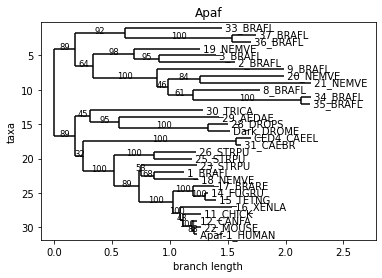

In [83]:
tree = Phylo.read("apaf.xml", "phyloxml")

# Flip branches so deeper clades are displayed at top
tree.ladderize()
Phylo.draw(tree)

## PhyloXML Format

In [84]:
# write a msa file

seqs = [('Alpha', 'AACGTGGCCACAT'),
        ('Beta', 'AAGGTCGCCACAC'),
        ('Delta', 'GAGATTTCCGCCT'),
        ('Epsilon', 'GAGATCTCCGCCC'),
        ('Gamma', 'CAGTTCGCCACAA')]

with open("msa.phy", 'w') as f:
    f.write("{:10} {}\n".format(5, 13))
    for seq in seqs:
        f.write("{:10} {}\n".format(*seq))


In [85]:
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio import AlignIO
aln = AlignIO.read('msa.phy', 'phylip')
print(aln)

Alignment with 5 rows and 13 columns
AACGTGGCCACAT Alpha
AAGGTCGCCACAC Beta
GAGATTTCCGCCT Delta
GAGATCTCCGCCC Epsilon
CAGTTCGCCACAA Gamma


In [86]:
constructor = DistanceTreeConstructor()
calculator = DistanceCalculator('identity')
dm = calculator.get_distance(aln)

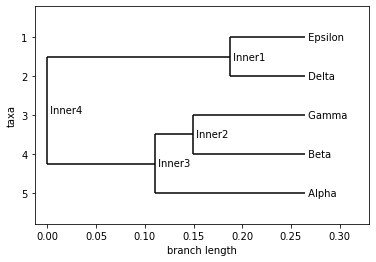

In [87]:
# draw upgma tree
upgmatree = constructor.upgma(dm)
Phylo.draw(upgmatree)

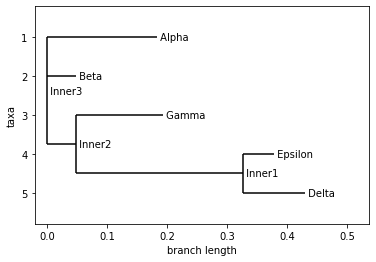

In [88]:
# draw nj tree
njtree = constructor.nj(dm)
Phylo.draw(njtree)

## Newick Format

In [89]:
# write a newick format file
with open("sample.dnd", "w") as f:
  f.write("(Alpha:0.18269,Beta:0.04808,((Delta:0.10256,Epsilon:0.05128):0.27885,Gamma:0.14423):0.04808);")

In [90]:
tree = Phylo.read("sample.dnd", "newick")
print(tree)

Tree(rooted=False, weight=1.0)
    Clade()
        Clade(branch_length=0.18269, name='Alpha')
        Clade(branch_length=0.04808, name='Beta')
        Clade(branch_length=0.04808)
            Clade(branch_length=0.27885)
                Clade(branch_length=0.10256, name='Delta')
                Clade(branch_length=0.05128, name='Epsilon')
            Clade(branch_length=0.14423, name='Gamma')


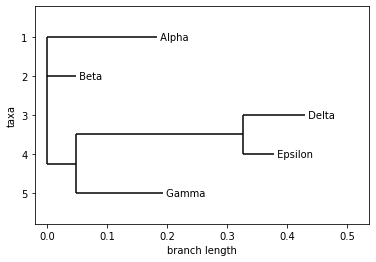

In [91]:
Phylo.draw(tree)

## Genetic Algorithm

# Exercise 1

In [92]:
# import libraries
import random
import string

# objective string
objetivo = "bioinformatics_programming"

# maximum number of candidates
GENES = 25
# maximum number of iterations
MAX_GENERACION = 10000


# set adn and fitness variables of each candidate by class 'Individuo'
class Individuo(object):
    def __init__(self, adn, fitness):
        self.adn = adn
        self.fitness = fitness

# function to calculate fitness between candidate and objective       
def calcular_fitness(origen, valor_objetivo):
    # initialize fitness with zero
    fitness = 0
    # iterate over candidate and add the subtraction squared value with objective to fitness
    for i in range(0, len(origen)):
        fitness += (ord(valor_objetivo[i]) - ord(origen[i])) ** 2
    return fitness

# calculate mutation
def mutacion(padre1, padre2):
    # initialize adn_hijo with padre1.adn
    adn_hijo = padre1.adn[:]

    # initialize start and end variables randomly with integer value
    start = random.randint(0, len(padre2.adn) - 1)
    stop = random.randint(0, len(padre2.adn) - 1)

    # comparing start and stop and assign small value to start and large value to stop
    if start > stop:
        stop, start = start, stop

    # replace start to end indices of adn_hijo with same indices of padre2.adn   
    adn_hijo[start:stop] = padre2.adn[start:stop]
    # take a random integer value as position 
    posicion = random.randint(0, len(adn_hijo) - 1)
    
    # replace position index of adn_hijo with [same, before or after] character of that position
    adn_hijo[posicion] = chr(ord(adn_hijo[posicion]) + random.randint(-1, 1))
    # calling calcular_fitness function with adn_hijo and objetivo
    fitness_hijo = calcular_fitness(adn_hijo, objetivo)
    # return adn_hijo and fitness_hijo as class object
    return Individuo(adn_hijo, fitness_hijo)


# function to randomly select a parent from population
def padre_al_azar(poblacion):
    return poblacion[int(random.random() * random.random() * (GENES - 1))]

# function to write simulation result
def escribe_generacion(generacion, poblacion):
    print('Pasos de simulación: %d' % generacion)
    print()
    print('  Fitness         ADN')
    print('------------------------')
    
    for candidato in poblacion:
        print("%6i %15s" % (candidato.fitness, ''.join(candidato.adn)))
    print()

# function to initialize population with candidates
def inicializa_poblacion():
    # create a list to store candidates
    poblacion = []
    # iterate over a fixed number of candidates
    for i in range(0, GENES):
        # randomly choice objetivo number of characters from printable characters for each candidate
        adn = [random.choice(string.printable[:-5]) for _ in range(0, len(objetivo))]
        # calling calcular_fitness function with adn and objetivo
        fitness = calcular_fitness(adn, objetivo)
        # make each candidate to class object
        candidate = Individuo(adn, fitness)
        # append the candidate into population
        poblacion.append(candidate)
    return poblacion

# function to simulate genetic algorithm
def simulacion():
    # initialize poblacion and generacion variable
    poblacion = inicializa_poblacion()
    generacion = 0

    # iterate untill generacion less than MAX_GENERACION
    while True and generacion < MAX_GENERACION:
        # add 1 with generacion
        generacion += 1
        # sort poblacion with the fitness value of candidate
        poblacion.sort(key=lambda candidate: candidate.fitness)
        
        # checking the fitness of first candidate is zero or not
        if poblacion[0].fitness == 0:
            break
        
        # randomly select parent 1
        padre1 = padre_al_azar(poblacion)
        # randomly select parent 2
        padre2 = padre_al_azar(poblacion)
        # find out mutation between parent 1 and parent 2
        hijo = mutacion(padre1, padre2)

        # checking fitness value between hijo and maximum candidate of population, if true, assign hijo
        if hijo.fitness < poblacion[-1].fitness:
            poblacion[-1] = hijo

    # checking generacion being equal to MAX_GENERACION
    if generacion == MAX_GENERACION:
        print(u'Se ha alcanzado el máximo de generaciones')
    # write the simulation result
    escribe_generacion(generacion, poblacion)

# start simulation to get outcome
simulacion()

Pasos de simulación: 5772

  Fitness         ADN
------------------------
     0 bioinformatics_programming
     1 bioinformatics_prngramming
     1 bioinformatics_prngramming
     1 bioinformatics_prngramming
     1 bioinformatics_prngramming
     1 bioinformatics_prngramming
     1 bioinformatics_prngramming
     1 bioinformatics_prngramming
     1 bioinformatics_prngramming
     1 bioinformatics_prngramming
     1 bioinformatics_prngramming
     1 bioinformatics_prngramming
     1 bioinformatics_prngramming
     1 bioinformatics_prngramming
     1 bioinformatics_prngramming
     1 bioinformatics_prngramming
     1 bioinformatics_prngramming
     1 bioinformatics_prngramming
     1 bioinformatics_prngramming
     1 bioinformatics_prngramming
     1 bioinformatics_prngramming
     1 bioinformatics_prngramming
     1 bioinformatics_prngramming
     1 bioinformatics_prngramming
     1 bioinformatics_prngramming



# Exercise 2

In [93]:
# import libraries
import random
import string
import math

# objective string
objetivo = "bioinformatics_programming"

# maximum number of candidates
GENES = 25
# maximum number of iterations
MAX_GENERACION = 10000


# set adn and fitness variables of each candidate by class 'Individuo'
class Individuo(object):
    def __init__(self, adn, fitness):
        self.adn = adn
        self.fitness = fitness

# function to calculate fitness between candidate and objective       
def calcular_fitness(origen, valor_objetivo):
    # iterate over origen and valor_objetivo together and return fitness
    fitness = sum([abs(ord(p)-ord(q))**2 for p, q in zip(valor_objetivo, origen)])
    return fitness
    
# calculate mutation
def mutacion(padre1, padre2):
    # initialize adn_hijo with padre1.adn
    adn_hijo = padre1.adn[:]

    # initialize start and end variables randomly with integer value
    start = random.randint(0, len(padre2.adn) - 1)
    stop = random.randint(0, len(padre2.adn) - 1)

    # comparing start and stop and assign small value to start and large value to stop
    if start > stop:
        stop, start = start, stop

    # replace start to end indices of adn_hijo with same indices of padre2.adn   
    adn_hijo[start:stop] = padre2.adn[start:stop]
    # take a random integer value as position 
    posicion = random.randint(0, len(adn_hijo) - 1)
    
    # replace position index of adn_hijo with [same, before or after] character of that position
    adn_hijo[posicion] = chr(ord(adn_hijo[posicion]) + random.randint(-1, 1))
    # calling calcular_fitness function with adn_hijo and objetivo
    fitness_hijo = calcular_fitness(adn_hijo, objetivo)
    # return adn_hijo and fitness_hijo as class object
    return Individuo(adn_hijo, fitness_hijo)


# function to randomly select a parent from population
def padre_al_azar(poblacion):
    return poblacion[int(random.random() * random.random() * (GENES - 1))]

# function to write simulation result
def escribe_generacion(generacion, poblacion):
    print('Pasos de simulación: %d' % generacion)
    print()
    print('  Fitness         ADN')
    print('------------------------')
    
    for candidato in poblacion:
        print("%6i %15s" % (candidato.fitness, ''.join(candidato.adn)))
    print()

# function to initialize population with candidates
def inicializa_poblacion():
    # create a list to store candidates
    poblacion = []
    # iterate over a fixed number of candidates
    for i in range(0, GENES):
        # randomly choice objetivo number of characters from printable characters for each candidate
        adn = [random.choice(string.printable[:-5]) for _ in range(0, len(objetivo))]
        # calling calcular_fitness function with adn and objetivo
        fitness = calcular_fitness(adn, objetivo)
        # make each candidate to class object
        candidate = Individuo(adn, fitness)
        # append the candidate into population
        poblacion.append(candidate)
    return poblacion

# function to simulate genetic algorithm
def simulacion():
    # initialize poblacion and generacion variable
    poblacion = inicializa_poblacion()
    generacion = 0

    # iterate untill generacion less than MAX_GENERACION
    while True and generacion < MAX_GENERACION:
        # add 1 with generacion
        generacion += 1
        # sort poblacion with the fitness value of candidate
        poblacion.sort(key=lambda candidate: candidate.fitness)
        
        # checking the fitness of first candidate is zero or not
        if poblacion[0].fitness == 0:
            break
        
        # randomly select parent 1
        padre1 = padre_al_azar(poblacion)
        # randomly select parent 2
        padre2 = padre_al_azar(poblacion)
        # find out mutation between parent 1 and parent 2
        hijo = mutacion(padre1, padre2)

        # checking fitness value between hijo and maximum candidate of population, if true, assign hijo
        if hijo.fitness < poblacion[-1].fitness:
            poblacion[-1] = hijo

    # checking generacion being equal to MAX_GENERACION
    if generacion == MAX_GENERACION:
        print(u'Se ha alcanzado el máximo de generaciones')
    # write the simulation result
    escribe_generacion(generacion, poblacion)

# start simulation to get outcome
simulacion()

Pasos de simulación: 7259

  Fitness         ADN
------------------------
     0 bioinformatics_programming
     1 bininformatics_programming
     1 bininformatics_programming
     1 bininformatics_programming
     1 bininformatics_programming
     1 bininformatics_programming
     1 bininformatics_programming
     1 bininformatics_programming
     1 bininformatics_programming
     1 bininformatics_programming
     1 bininformatics_programming
     1 bininformatics_programming
     1 bininformatics_programming
     1 bininformatics_programming
     1 bininformatics_programming
     1 bininformatics_programming
     1 bininformatics_programming
     1 bininformatics_programming
     1 bininformatics_programming
     1 bininformatics_programming
     1 bininformatics_programming
     1 bininformatics_programming
     1 bininformatics_programming
     1 bininformatics_programming
     1 bininformatics_programming



# Exercise 3

In [94]:
# import libraries
import random
import string
import math

# objective string
objetivo = "bioinformatics_programming"

# maximum number of candidates
GENES = 25
# maximum number of iterations
MAX_GENERACION = 10000
# to store fitness of all steps
fitnesses = {}

# set adn and fitness variables of each candidate by class 'Individuo'
class Individuo(object):
    def __init__(self, adn, fitness):
        self.adn = adn
        self.fitness = fitness

# function to calculate fitness between candidate and objective       
def calcular_fitness(origen, valor_objetivo):
    # iterate over origen and valor_objetivo together and return fitness
    fitness = sum([(ord(p)-ord(q))**2 for p, q in zip(valor_objetivo, origen)])
    return fitness
    
# calculate mutation
def mutacion(padre1, padre2):
    # initialize adn_hijo with padre1.adn
    adn_hijo = padre1.adn[:]

    # initialize start and end variables randomly with integer value
    start = random.randint(0, len(padre2.adn) - 1)
    stop = random.randint(0, len(padre2.adn) - 1)

    # comparing start and stop and assign small value to start and large value to stop
    if start > stop:
        stop, start = start, stop

    # replace start to end indices of adn_hijo with same indices of padre2.adn   
    adn_hijo[start:stop] = padre2.adn[start:stop]
    # take a random integer value as position 
    posicion = random.randint(0, len(adn_hijo) - 1)
    
    # replace position index of adn_hijo with [same, before or after] character of that position
    adn_hijo[posicion] = chr(ord(adn_hijo[posicion]) + random.randint(-1, 1))
    # calling calcular_fitness function with adn_hijo and objetivo
    fitness_hijo = calcular_fitness(adn_hijo, objetivo)
    # return adn_hijo and fitness_hijo as class object
    return Individuo(adn_hijo, fitness_hijo)


# function to randomly select a parent from population
def padre_al_azar(poblacion):
    return poblacion[int(random.random() * random.random() * (GENES - 1))]

# function to write simulation result
def escribe_generacion(generacion, poblacion):
    print('Pasos de simulación: %d' % generacion)
    print()
    print('  Fitness         ADN')
    print('------------------------')
    
    for candidato in poblacion:
        print("%6i %15s" % (candidato.fitness, ''.join(candidato.adn)))
    print()

# function to initialize population with candidates
def inicializa_poblacion():
    # create a list to store candidates
    poblacion = []
    # iterate over a fixed number of candidates
    for i in range(0, GENES):
        # randomly choice objetivo number of characters from printable characters for each candidate
        adn = [random.choice(string.printable[:-5]) for _ in range(0, len(objetivo))]
        # calling calcular_fitness function with adn and objetivo
        fitness = calcular_fitness(adn, objetivo)
        # make each candidate to class object
        candidate = Individuo(adn, fitness)
        # append the candidate into population
        poblacion.append(candidate)
    return poblacion

# function to simulate genetic algorithm
def simulacion():
    # initialize poblacion and generacion variable
    poblacion = inicializa_poblacion()
    generacion = 0
    #fitnesses.update({generacion : poblacion.fitness})

    # iterate untill generacion less than MAX_GENERACION
    while True and generacion < MAX_GENERACION:
        # add 1 with generacion
        generacion += 1
        # sort poblacion with the fitness value of candidate
        poblacion.sort(key=lambda candidate: candidate.fitness)
        
        # checking the fitness of first candidate is zero or not
        if poblacion[0].fitness == 0:
            break
        
        # randomly select parent 1
        padre1 = padre_al_azar(poblacion)
        # randomly select parent 2
        padre2 = padre_al_azar(poblacion)
        # find out mutation between parent 1 and parent 2
        hijo = mutacion(padre1, padre2)
        
        fitnesses.update({generacion : hijo.fitness})

        # checking fitness value between hijo and maximum candidate of population, if true, assign hijo
        if hijo.fitness < poblacion[-1].fitness:
            poblacion[-1] = hijo

    # checking generacion being equal to MAX_GENERACION
    if generacion == MAX_GENERACION:
        print(u'Se ha alcanzado el máximo de generaciones')
    # write the simulation result
    escribe_generacion(generacion, poblacion)

# start simulation to get outcome
simulacion()

Pasos de simulación: 5187

  Fitness         ADN
------------------------
     0 bioinformatics_programming
     1 bioinformatics_programmimg
     1 bioinformatics_programmimg
     1 bioinformatics_programmimg
     1 bioinformatics_programmimg
     1 bioinformatics_programmimg
     1 bioinformatics_programmimg
     2 bioinformatics_progr`mmimg
     2 bioinformatics_progr`mmimg
     2 bioinformatics_progr`mmimg
     2 bioinformatics_progr`mmimg
     2 bioinformatics_progr`mmimg
     2 bioinformatics_progr`mmimg
     2 bioinformatics_progr`mmimg
     2 bioinformatics_progr`mmimg
     2 bioinformatics_progr`mmimg
     2 bioinformatics_progr`mmimg
     2 bioinformatics_progr`mmimg
     2 bioinformatics_progr`mmimg
     2 bioinformatics_progr`mmimg
     2 bioinformatics_progr`mmimg
     2 bioinformatics_progr`mmimg
     2 bioinformatics_progr`mmimg
     2 bioinformatics_progr`mmimg
     2 bioinformatics_progr`mmimg



In [95]:
print(fitnesses)

{1: 30593, 2: 48823, 3: 42179, 4: 29804, 5: 39727, 6: 29932, 7: 24814, 8: 21555, 9: 29451, 10: 29683, 11: 27874, 12: 20915, 13: 27881, 14: 22579, 15: 21331, 16: 21430, 17: 17731, 18: 15764, 19: 19532, 20: 23438, 21: 15727, 22: 15368, 23: 15802, 24: 21362, 25: 18400, 26: 21822, 27: 14103, 28: 13570, 29: 17680, 30: 14098, 31: 14061, 32: 15663, 33: 13167, 34: 14071, 35: 16012, 36: 14091, 37: 15658, 38: 14090, 39: 17749, 40: 15763, 41: 14156, 42: 13069, 43: 13070, 44: 10826, 45: 14058, 46: 10778, 47: 13126, 48: 13069, 49: 13116, 50: 13030, 51: 13984, 52: 10778, 53: 13069, 54: 10826, 55: 13913, 56: 12998, 57: 12956, 58: 13999, 59: 14040, 60: 10789, 61: 10762, 62: 10789, 63: 10778, 64: 10762, 65: 9894, 66: 10819, 67: 10789, 68: 9894, 69: 9935, 70: 9894, 71: 9864, 72: 9846, 73: 9871, 74: 9894, 75: 9864, 76: 9928, 77: 9871, 78: 9839, 79: 10017, 80: 9893, 81: 9844, 82: 9839, 83: 9808, 84: 9839, 85: 9809, 86: 9910, 87: 9852, 88: 9986, 89: 9846, 90: 9865, 91: 9879, 92: 9922, 93: 9808, 94: 9821, 9

In [96]:
from matplotlib import pyplot as plt

In [97]:
maximum = max(fitnesses.items(), key=lambda x:x[1])
minimum = min(fitnesses.items(), key=lambda x:x[1])
mean = sum(fitnesses.values()) / len(fitnesses)
d = {k : abs(v-mean) for k, v in fitnesses.items()}
mean_key = min(d, key=d.get)

print(maximum, minimum, (mean_key, mean))

(2, 48823) (5186, 0) (2123, 3282.452757423833)


Text(0.5, 1.0, 'Fitness Vs Iterations')

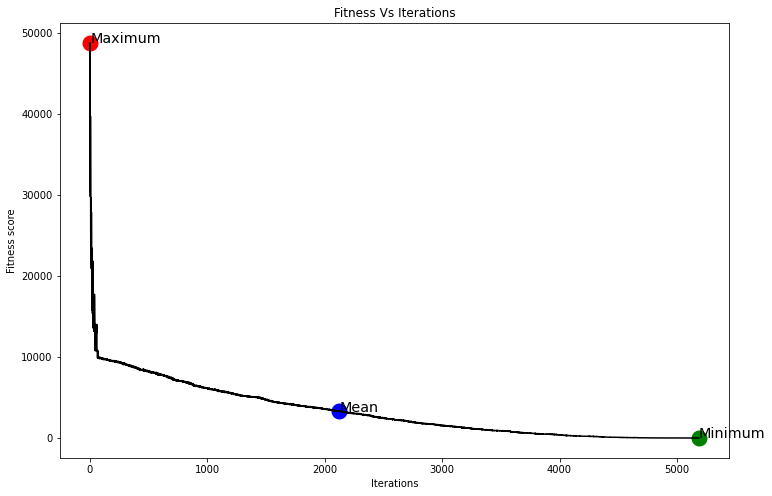

In [98]:
plt.figure(figsize=(12,8))
plt.plot(list(fitnesses.keys()), list(fitnesses.values()), color='black')
plt.scatter(maximum[0], maximum[1], color='red', linewidths=10)
plt.text(maximum[0], maximum[1], "Maximum", fontsize='x-large')
plt.scatter(minimum[0], minimum[1], color='green', linewidths=10)
plt.text(minimum[0], minimum[1], "Minimum", fontsize='x-large')
plt.scatter(mean_key, mean, color='blue', linewidths=10)
plt.text(mean_key, mean, "Mean", fontsize='x-large')
plt.xlabel("Iterations")
plt.ylabel("Fitness score")
plt.title("Fitness Vs Iterations")
